<div dir="rtl">

## ساختار برنامه نوشته شده 

برنامه زمانبند با زبان 
`Rust` 
نوشته شده است. محتوای کد در پوشه 
src/
قرار دارد. در این پوشه فایل‌های زیر قرار گرفته است:

1. **main.rs**:
فایل اصلی که اجرای برنامه را آغاز کرده و حاوی 
`Aurgument Parser`
می‌باشد که به کمک آن آرگون‌های ورودی را استخراج می‌کند. همچنین یک زمانبند از نوع
`Scheduler`
ساخته و با توجه به نوع آرگومان‌ها، 
`Dispatcher`
مناسب
(الویت محوری یا تصادفی)
را ساخته و به اندازه زمان ورودی داده شده، شبیه‌سازی را اجرا می‌کند. در نهایت‌ هم با استفاده از متد
export()
جدول شبیه‌سازی را به صورت یک فایل
csv
خروجی می‌دهد.

2. **lib.rs**:
در این فایل ساختار
`Scheduler`
تعریف شده است. اجرای آن با متد 
run()
صورت می‌گیرد. هر بار با صدا زدن این تابع، شبیه‌سازی یک واحد زمانی به جلو حرکت کرده و زمانبند در هر واحد زمانی به ترتیب کار‌های زیر را انجام می‌دهد:
   1. از بخش 
job_creator
تسک‌های جدید را در صورت وجود دریافت می‌کند.
   2. با استفاده از تابع
sync_jobs()
تسک‌ها را (با توجه به شرایط ذکر شده در سند پروژه) به ترتیب اولویت از صف اولویت لایه اول به لایه دوم منتقل می‌کند.
   3. اگر در حال تسکی برای اجرا نباشد، از سه صف موجود در لایه دوم بر اساس نوع
dispatcher
یک تسک را انتخاب کرده و آن را به اندازه یک واحد زمانی اجرا می‌کند.

همچنین برای ساخت زمانبند کافی است متد
new()
را صدا بزنیم. هنگام ساخت زمانبند، نوع
dispatcher
مشخص می‌شود. در جدول شبیه‌سازی خروجی یک ستون به نام 
status
وجود دارد که وضعیت اجرایی آن تسک را نشان می‌دهد که یکی از سه حالت اتمام، آماده به اجرا و
timeout
می‌باشد.

3. **job_creator.rs**:
در این فایل، تسک‌ها با توزیع پواسون هنگام شبیه‌سازی ساخته می‌شوند. هنگام شبیه‌سازی شی
`Scheduler`
متد
poll()
از این شی را در هر لحظه صدا زده و 
job_creator
دارای متغیری به نام
next_dispatch
می‌باشد که از توزیع پواسون پیروی می‌کند و با هر بار صدا زدن تابع
poll()
یک واحد از آن کم می‌شود و اگر به صفر برسد،
job_creator
یک تسک را می‌سازد و به زمانبند تقدیم می‌کند.
(متغیر
next_dispatch
بعد از هر بار صفر شدن، باری دیگر طبق توزیع پاسون مقداری به خود می‌گیرد.)

4. **job_dsipatcher.rs**:
در این فایل دو ساختار
`JobDispathcer`
و
`WeightedDispatcher`
تعریف شده اند که در اولین ساختار تسک‌ها به ترتیب اولویت صف‌های لایه دوم اجرا می‌شوند و در در دومین مورد یک عدد تصادفی ساخته شده و تسک‌ها بنابر جدول احتمال موجود در سند پروژه اجرا می‌شوند.

5. **queue.rs**:
در این فایل صف‌های موجود در پروژه تعریف شده‌اند. دو نوع صف
`RRQueue`
و
`Fifo`
تعریف شده اند. این صف‌ها هر کدام حاوی توابع
push()
و
pop()
برای به‌روزرسانی خود می‌باشند.

6. **task.rs**:
در این فایل‌ شی تسک به وسیله ساختار‌های
`Task`،
`TaskDefinition`
توصیف شده است. هر شی
`TaskDefinition`
حاوی تعریف آن تسک شامل زمان اجرا، اولویت و 
timeout
آن می‌باشد. همچنین شی
`Task`
علاوه بر داشتن یک توصیف
`TaskDefinition`
حاوی مواردی مانند زمان ورود، زمان شروع اجرا، زمان پایان اجرا، درصد باقیمانده از اجرا و وضعیت اجرا دارد. هنگام شبیه‌سازی 
`Schedueler`
در هر واحد هنگامی که 
job_creator
یک 
TaskDefinition
جدید در اختیار زمانبند قرار می‌دهد، زمانبند با استفاده از متد
submit()
از روی تعریف یک شی
`Task`
را ساخته و بعد از مقداردهی فیلد‌های آن، در صف‌ اولویت لایه اول قرار می دهد.

7. **context.rs**:
در این فایل نحوه اجرای تسک‌ها توصیف شده است. دو ساختار
`DefaultContext`
و
`DeadlineContext`
تعریف شده اند که حاوی شی 
`Task`
و متدی به نام
exec()
می‌باشند. این تابع به صورت پیش‌فرض 
(`DefaultContext`)
متد
exec()
آن تسک را صدا زده و وضعیت آن را به‌روز‌رسانی می‌کند. همچنین در صورتی که 
context
یک تسک از نوع
`Deadline`
باشد، قبل از اجرای تسک، چک می‌کند که آیا اجرای آن تسک از ددلاین گذشته است یا نه.

8. **error.rs**:
در این فایل خطا‌ها و استثنا‌هایی که هنگام شبیه‌سازی به وجود می‌آید، تعریف شده است. به عنوان مثال اگر آرگومان‌های مربوط به پارامتر‌های
X
و
Y
در توزیع‌های پواسون و نمایی عددی منفی وارد شوند، برنامه به ترتیب استثنا‌های
`PoissonError`
و
`ExpError`
را باز می‌گرداند.
</div>

<div dir="rtl">

## نحوه ساخت و اجرای پروژه

برای ساخت پروژه ابتدا می‌بایست 
Rust
را نصب داشته باشید، برای نصب 
Rust
می‌توانید با این
[لینک](https://www.rust-lang.org/tools/install)
مراجعه کنید.
بعد از نصب
Rust
برای ساخت پروژه می‌توانید به مسیر پروژه مراجعه کرده و دستور زیر را اجرا کنید.
</div>

```rust
 cargo build --release
```

<div dir="rtl">
بعد از ساخت موفقیت آمیز پروژه، فایل اجرایی باینری 
simul
در مسیر
target/release/simul
قرار می گیرد.
برای مشاهده آرگومان‌ها کافی است با آرگومان
--help
یا
-h
برنامه را اجرا کنیم. آرگومان‌ها به شرح زیر می‌باشند:
</div>

1. **--sync_period** یا **-s**:
<div dir="rtl">
برابر با بازه زمانی انتقال تسک‌ها از لایه اول به لایه دوم می‌باشد.
</div>

2. **--job-threshold** یا **-j**:
<div dir="rtl">
برابر با مقدار ثابت
K
در سند پروژه بوده و معادل با حداکثر تعداد تسک‌هایی می‌باشد که از صف لایه اول به لایه دوم منتقل می‌شود.
</div>

3. **--arrival-rate** یا **-a**:
<div dir="rtl">
برابر با مقدار ثابت
X
در سند پروژه بوده و معادل با نرخ تولید تسک‌ها توسط
dipatcher
می‌باشد.
</div>

4. **--exec-rate** یا **-e**:
<div dir="rtl">
برابر با مقدار ثابت
Y
در سند پروژه بوده و معادل با نرخ زمان سرویس تسک‌ها می‌باشد.
</div>

5. **--t1** و **--t2**:
<div dir="rtl">
به ترتیب برابر با مقادیر ثابت
T1
و
T2
در سند پروژه می‌باشد و معادل با حداکثر زمان اجرای تسک در صف‌های
Round-Robin-T1
و
Round-Robin-T2
می‌باشند.
</div>

6. **--timeout-rate** یا **-t**:
<div dir="rtl">
برابر با مقدار ثابت
Z
در سند پروژه بوده و معادل با نرخ زمان
timeout
تسک‌ها می‌باشد. اگر استفاده نشود، 
timeout
ای برای اجرای تسک‌ها در نظر گرفته نمی‌شود.
</div>

7. **--weighted-dispatcher** یا **-w**:
<div dir="rtl">
پرچمی جهت انتخاب نوع 
dispatcher
می‌باشد. اگر این پرچم به کار رود، نوع
dispatcher
تصادفی خواهد بود.
</div>

8. **--duration** یا **-d**:
<div dir="rtl">
برابر با زمان شبیه‌سازی می‌باشد.
</div>

9. **--output_path** یا **-o**:
<div dir="rtl">
برابر با مسیر جدول شبیه‌سازی خروجی می‌باشد.
</div>

<div dir="rtl">

## مثال از اجرای شبیه‌سازی

بنابر پارامتر‌های تعریف شده، پنج مرتبه شبیه‌سازی را با پارامتر‌های گوناگون اجرا می‌کنیم. همچنین برای درست بودن محاسباتمان، در جداول شبیه‌سازی بدست آمده مقدار 
service_end
تسک‌های آماده به کار را برابر با زمان شبیه‌سازی قرار می‌دهیم.
</div>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

SIM_TIME = 3000
SIM_NUM = 5

In [53]:
!./target/release/simul -s 5 -j 10 -a 20 -e 5 --t1 4 --t2 2 -d 3000 -o out1.csv
!./target/release/simul -s 10 -j 10 -a 100 -e 10 --t1 0 --t2 10 -d 3000 -w -o out2.csv
!./target/release/simul -s 10 -j 20 -a 10 -e 10 --t1 0 --t2 0 -t 50 -d 3000 -o out3.csv
!./target/release/simul -s 10 -j 10 -a 100 -e 20 --t1 10 --t2 0 -t 100 -d 3000 -w -o out4.csv
!./target/release/simul -s 10 -j 10 -a 100 -e 100 --t1 20 --t2 20 -t 1000 -d 3000 -w -o out5.csv

20263.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
20269.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
20274.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
20279.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
20284.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [62]:
input_files = ['out' + str(i+1) + '.csv' for i in range(SIM_NUM)]
dfs = [pd.read_csv(f) for f in input_files]
for df in dfs:
    df.index.name = "task ID"
    df.loc[df["status"] == "Ready", "service_end"] = SIM_TIME

,service_start,service_end,arrival_time,service_time,exec_time,priority,status
task ID,,,,,,,
0,9,20,0,11,16,Low,TimeOut
1,0,0,97,0,33,Normal,TimeOut
2,0,0,205,0,26,Low,TimeOut
3,0,0,315,0,4,High,TimeOut
4,0,0,421,0,3,Normal,TimeOut
5,0,0,516,0,6,High,TimeOut
6,0,0,620,0,20,Low,TimeOut
7,0,0,739,0,28,Normal,TimeOut
8,0,0,823,0,12,Low,TimeOut


<div dir="rtl">

#### میانگین طول صف‌ها

برای محاسبه میانگین زمانی تعداد افراد در سیستم از رابطه زیر استفاده می‌کنیم:
</div>

$$\hat{L}=\frac{1}{T} \sum_{i=0}^{\infty} iT_i= \sum_{i=0}^{\infty} i\frac{T_i}{T}$$

<div dir="rtl">
حال نمودار تعداد افراد حاضر در سیستم را بدست می‌آوریم. 
</div>

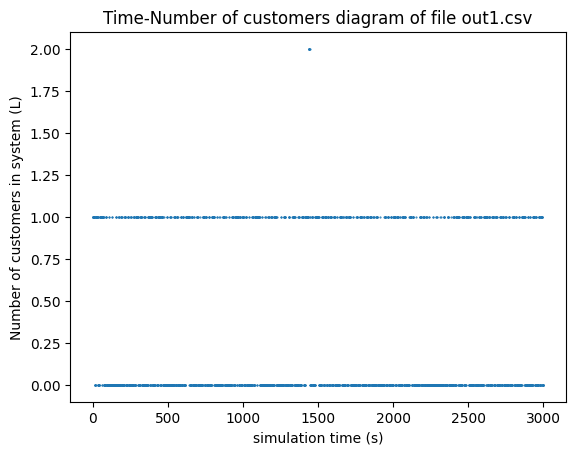

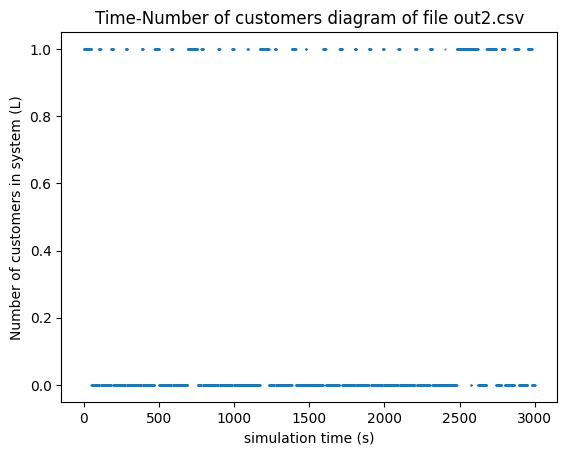

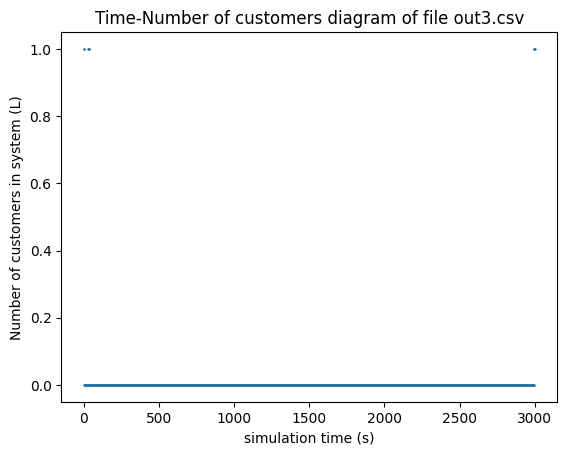

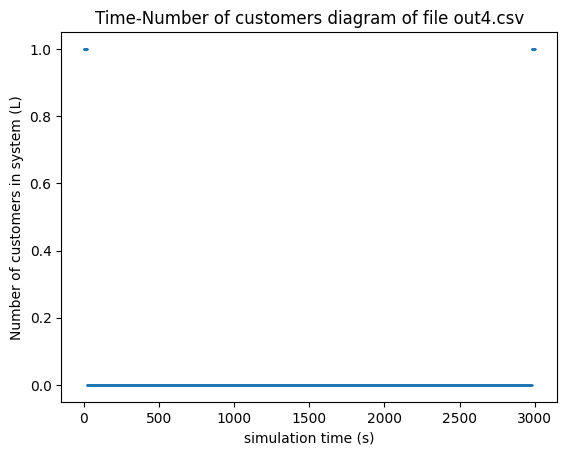

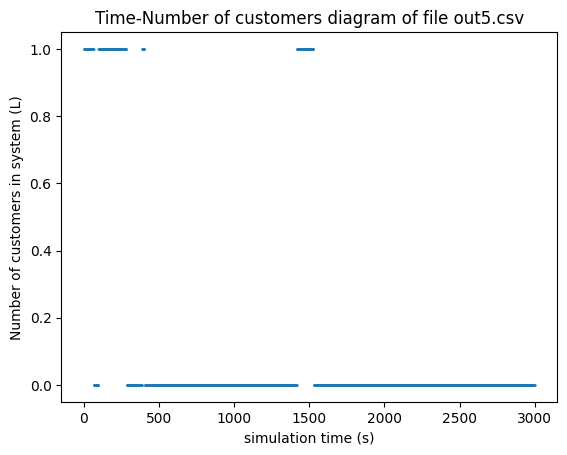

In [55]:
Ls = []
for i, df in enumerate(dfs):
    L = [0] * (SIM_TIME + 1)
    for _, t in df.iterrows():
        for j in range(t["arrival_time"], t["service_end"]+1):
            L[j] += 1
    Ls.append(L)

    _, main_ax = plt.subplots()
    main_ax.plot(L, linestyle='None', marker='.', markersize=1)
    main_ax.set_xlabel('simulation time (s)')
    main_ax.set_ylabel('Number of customers in system (L)')
    main_ax.set_title(f'Time-Number of customers diagram of file {input_files[i]}')
    plt.show()

<div dir="rtl">
از آنجایی که سیستم تک پردازنده می‌باشد، می‌توان برای طول صف رابطه زیر را در نظر گرفت:
</div>

$$L_Q(t) = \left\{\begin{matrix} 0 & L(t) = 0\\  L(t) - 1 & L(t) > 0 \end{matrix}\right.$$

<div dir="rtl">
طبق رابطه مذکور میانگین طول صف بدست می‌آید.
</div>

In [56]:
for i, df in enumerate(dfs):
    LQ = [j-1 for j in Ls[i] if j > 0]
    avg_LQ = np.dot(*np.unique(LQ, return_counts=True))/SIM_TIME
    print(f"average queue length of file {input_files[i]}: ", avg_LQ)

average queue length of file out1.csv:  0.0026666666666666666
average queue length of file out2.csv:  0.0
average queue length of file out3.csv:  0.0
average queue length of file out4.csv:  0.0
average queue length of file out5.csv:  0.0


<div dir="rtl">

#### میانگین زمان صرف شده در صف‌ها

از آنجایی که زمان ورود هر تسک به سیستم برابر با
arrival_time
زمان خروج آن برابر با،
service_end
و زمان اجرای آن برابر با
service_time
می‌باشد. زمانی که هر تسک در صف‌ها قرار دارد با رابطه زیر قابل محاسبه خواهد بود:
</div>

$$\hat{W_Q}=\frac{1}{N} \sum_{i=0}^{N} T^{exit}_{i} - (T^{arrival}_i + T^{service}_i) + 1$$

In [57]:
for i, df in enumerate(dfs):
    avg_WQ = sum(t['service_end'] - t['arrival_time'] - t['service_time'] + 1 for _, t in df.iterrows())/len(df)
    print(f"average waiting in queue of file {input_files[i]}: ", avg_WQ)

average waiting in queue of file out1.csv:  2.699300699300699
average waiting in queue of file out2.csv:  12.870967741935484
average waiting in queue of file out3.csv:  -1473.4
average waiting in queue of file out4.csv:  -1393.8333333333333
average waiting in queue of file out5.csv:  -1406.1


<div dir="rtl">

#### میزان بهره‌وری پردازنده

با استفاده از رابطه زیر می‌توان بهره‌وری پردازه را محاسبه کرد:
</div>

$$\hat{\rho}=\frac{\text{Total time server is busy}}{\text{Total simulation time}}=\frac{\sum_{i=1}^{\infty}T_i}{T}=1-\frac{T_0}{T}$$

In [58]:
for i, df in enumerate(dfs):
    utilization = 1 - len([j for j in Ls[i] if j == 0])/SIM_TIME
    print(f"processor utilization of file {input_files[i]}: ", utilization)

processor utilization of file out1.csv:  0.353
processor utilization of file out2.csv:  0.242
processor utilization of file out3.csv:  0.004666666666666708
processor utilization of file out4.csv:  0.013333333333333308
processor utilization of file out5.csv:  0.1266666666666667


<div dir="rtl">

#### درصد پردازه‌های منقضی شده

در میان پردازه‌های موجود در جدول شبیه‌سازی، آن پردازه‌هایی منقضی محسوب می‌شوند که وضعیت اجرایشان
TimeOut
باشد. در نتیجه درصد پردازه‌های منقضی شده به شکل زیر محاسبه می‌شود:
</div>

In [59]:
for i, df in enumerate(dfs):
    dropped_tasks = len([_ for _, t in df.iterrows() if t['status'] == "TimeOut"])/len(df)
    print(f"timedout process rate {input_files[i]}: ",  dropped_tasks)

timedout process rate out1.csv:  0.0
timedout process rate out2.csv:  0.0
timedout process rate out3.csv:  0.9890909090909091
timedout process rate out4.csv:  0.9666666666666667
timedout process rate out5.csv:  0.9


<div dir="rtl">

## بهبود میانگین صرف شده در صف‌ها

با مقایسه زمان بدست آمده مربوط به مقادیر صرف شده در صف‌ها، بیشترین زمان صرف شده در صف مربوط به زمانی است که زمان کوانتوم دو صف لایه دوم برابر با صفر باشد، یا اینکه برابر با بیشترین زمان سرویس تسک باشد. به طوری تسک‌ها به صورت 
FIFO
اجرا شوند. برای بهبود میانگین زمان صرف شده در صف‌ها می‌توان زمان کوانتوم دو صف لایه دوم را به گونه‌ای تغییر داد که در لایه دوم بیشترین تعداد تسک‌ها در صف
Round-Robin
اول، تعداد کمتری در صف
Round-Robin
دوم، و کمترین تعداد در صف
FCFS
لایه سوم قرار گرفته و توسط پردازنده اجرا شوند. این به خاطر این است که تسک‌های صف دوم لایه دوم زمانی اجرا می‌شوند که حداقل یک دور تسک‌های صف اول لایه دوم اجرا شوند و تسک‌های موجود در صف سوم لایه دوم زمانی اجرا می‌شوند که یک دور تسک‌های دو صف اول لایه دوم اجرا شده باشند. در نتیجه با جلو رفتن به صف‌های پایین‌تر در لایه دوم، می‌بایست تعداد تسک‌ کمتری نسبت به صف قبلی قرار بگیرد.
در جدول احتمالی انتخاب صف لایه دوم در بخش امتیازی پروژه می‌توان به خوبی رعایت این مسئله را مشاهده کرد و زمانی که
dispatcher
تسک‌ها را در صف‌های لایه دوم طبق آن جدول به شکل تصادفی قرار می‌دهد، زمان انتظار تسک‌ها به نسبت کمتر خواهد شد.
</div>